In [24]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%202%20Lesson%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [26]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import mean_absolute_error
from tensorflow.keras.callbacks import LearningRateScheduler, History
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [27]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 20
slope = 0.09
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

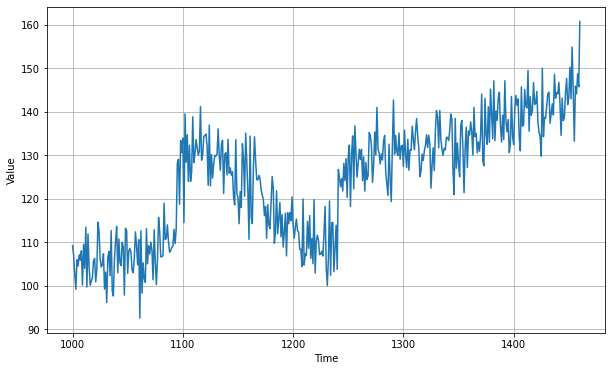

In [28]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)


In [29]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [30]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    Dense(units=10, activation="relu", name="dense_1", input_shape=[window_size]), 
    Dense(units=10, activation="relu", name="dense_2"), 
    Dense(units=1, name="dense_3")
])

model.compile(
    loss="mse", 
    optimizer=SGD(lr=1e-6, momentum=0.9),
    metrics=["mse"]
)
model.fit(
    dataset,
    epochs=100,
    workers=-1,
    use_multiprocessing=True
)


Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 1110.0638 - mse: 1110.0638
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 74.0805 - mse: 74.0805
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 51.4177 - mse: 51.4177
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 49.7631 - mse: 49.7631
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 49.4772 - mse: 49.4772
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 48.8243 - mse: 48.8243
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 48.6994 - mse: 48.6994
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 47.9072 - mse: 47.9072
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 48.1222 - mse: 48.1222
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 46.9460 - mse: 46.9460
Epoch 11/100
31/31 [===============

31/31 [==============================] - 0s 2ms/step - loss: 37.3060 - mse: 37.3060
Epoch 86/100
31/31 [==============================] - 0s 2ms/step - loss: 37.5743 - mse: 37.5743
Epoch 87/100
31/31 [==============================] - 0s 2ms/step - loss: 37.2559 - mse: 37.2559
Epoch 88/100
31/31 [==============================] - 0s 2ms/step - loss: 37.5911 - mse: 37.5911
Epoch 89/100
31/31 [==============================] - 0s 2ms/step - loss: 37.1291 - mse: 37.1291
Epoch 90/100
31/31 [==============================] - 0s 2ms/step - loss: 37.2960 - mse: 37.2960
Epoch 91/100
31/31 [==============================] - 0s 2ms/step - loss: 36.9211 - mse: 36.9211
Epoch 92/100
31/31 [==============================] - 0s 2ms/step - loss: 37.0850 - mse: 37.0850
Epoch 93/100
31/31 [==============================] - 0s 2ms/step - loss: 36.9589 - mse: 36.9589
Epoch 94/100
31/31 [==============================] - 0s 2ms/step - loss: 37.9418 - mse: 37.9418
Epoch 95/100
31/31 [=======================

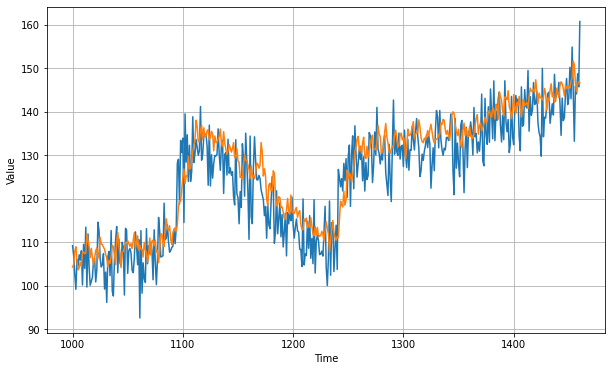

In [31]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [32]:
print(mean_absolute_error(x_valid, results).numpy())

5.190308


In [33]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = Sequential([
    Dense(units=10, activation="relu", name="dense_1", input_shape=[window_size]), 
    Dense(units=10, activation="relu", name="dense_2"), 
    Dense(units=1, name="dense_3")
])

model.compile(
    loss="mse", 
    optimizer=SGD(lr=1e-8, momentum=0.9),
    metrics=["mse"]
)
history: History = model.fit(
    dataset, 
    epochs=100, 
    workers=-1,
    use_multiprocessing=True,
    callbacks=[
        LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
    ]
)

Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 82.7340 - mse: 82.7340
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 75.3687 - mse: 75.3687
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 73.2710 - mse: 73.2710
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 72.5991 - mse: 72.5991
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 72.1863 - mse: 72.1863
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 71.8666 - mse: 71.8666
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 71.2318 - mse: 71.2318
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 70.6484 - mse: 70.6484
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 69.9030 - mse: 69.9030
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 69.0855 - mse: 69.0855
Epoch 11/100
31/31 [===================

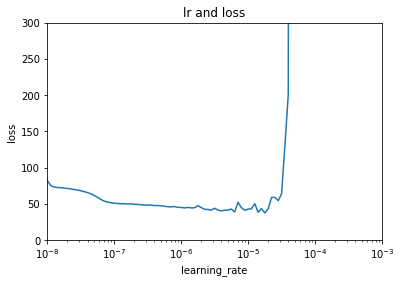

<Figure size 432x288 with 0 Axes>

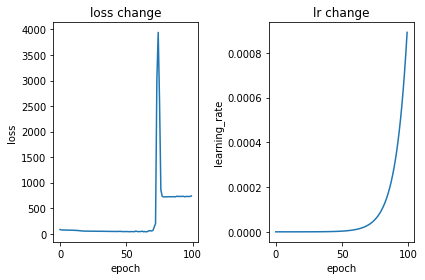

In [34]:
plt.figure(1)
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])
plt.xlabel("learning_rate")
plt.ylabel("loss")
plt.title("lr and loss")
plt.show()

plt.figure(2)
plt.subplots(1, 2)
plt.subplot(121)
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("loss change")
plt.subplot(122)
plt.plot(lrs)
plt.xlabel("epoch")
plt.ylabel("learning_rate")
plt.title("lr change")
plt.tight_layout()
plt.show()

In [36]:
window_size = 30
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential([
  Dense(units=10, activation="relu", name="dense_1", input_shape=[window_size]),
  Dense(units=10, activation="relu", name="dense_2"),
  Dense(units=1, name="dense_3")
])

model.compile(
    loss="mse", 
    optimizer=SGD(8e-6, momentum=0.9),
    metrics=["mse"]
)

history: History = model.fit(
    dataset, 
    epochs=500,
    workers=-1,
    use_multiprocessing=True
)

Epoch 1/500
31/31 [==============================] - 0s 2ms/step - loss: 1272.6575 - mse: 1272.6575
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 86.9501 - mse: 86.9501
Epoch 3/500
31/31 [==============================] - 0s 2ms/step - loss: 52.5390 - mse: 52.5390
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 48.2470 - mse: 48.2470
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 46.1172 - mse: 46.1172
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 42.3156 - mse: 42.3156
Epoch 7/500
31/31 [==============================] - 0s 2ms/step - loss: 41.3317 - mse: 41.3317
Epoch 8/500
31/31 [==============================] - 0s 2ms/step - loss: 40.7072 - mse: 40.7072
Epoch 9/500
31/31 [==============================] - 0s 2ms/step - loss: 43.1537 - mse: 43.1537
Epoch 10/500
31/31 [==============================] - 0s 2ms/step - loss: 49.7239 - mse: 49.7239
Epoch 11/500
31/31 [===============

31/31 [==============================] - 0s 2ms/step - loss: 35.1915 - mse: 35.1915
Epoch 169/500
31/31 [==============================] - 0s 2ms/step - loss: 35.8870 - mse: 35.8870
Epoch 170/500
31/31 [==============================] - 0s 2ms/step - loss: 42.5851 - mse: 42.5851
Epoch 171/500
31/31 [==============================] - 0s 2ms/step - loss: 41.0127 - mse: 41.0127
Epoch 172/500
31/31 [==============================] - 0s 2ms/step - loss: 33.9202 - mse: 33.9202
Epoch 173/500
31/31 [==============================] - 0s 2ms/step - loss: 33.8397 - mse: 33.8397
Epoch 174/500
31/31 [==============================] - 0s 2ms/step - loss: 33.6058 - mse: 33.6058
Epoch 175/500
31/31 [==============================] - 0s 2ms/step - loss: 34.0486 - mse: 34.0486
Epoch 176/500
31/31 [==============================] - 0s 2ms/step - loss: 38.5251 - mse: 38.5251
Epoch 177/500
31/31 [==============================] - 0s 2ms/step - loss: 34.1951 - mse: 34.1951
Epoch 178/500
31/31 [=============

31/31 [==============================] - 0s 2ms/step - loss: 33.5610 - mse: 33.5610
Epoch 335/500
31/31 [==============================] - 0s 2ms/step - loss: 35.2502 - mse: 35.2502
Epoch 336/500
31/31 [==============================] - 0s 2ms/step - loss: 33.6838 - mse: 33.6838
Epoch 337/500
31/31 [==============================] - 0s 2ms/step - loss: 35.3619 - mse: 35.3619
Epoch 338/500
31/31 [==============================] - 0s 2ms/step - loss: 33.6199 - mse: 33.6199
Epoch 339/500
31/31 [==============================] - 0s 2ms/step - loss: 36.2857 - mse: 36.2857
Epoch 340/500
31/31 [==============================] - 0s 2ms/step - loss: 35.1131 - mse: 35.1131
Epoch 341/500
31/31 [==============================] - 0s 2ms/step - loss: 34.8395 - mse: 34.8395
Epoch 342/500
31/31 [==============================] - 0s 2ms/step - loss: 39.1594 - mse: 39.1594
Epoch 343/500
31/31 [==============================] - 0s 2ms/step - loss: 33.4063 - mse: 33.4063
Epoch 344/500
31/31 [=============

31/31 [==============================] - 0s 2ms/step - loss: 32.6110 - mse: 32.6110


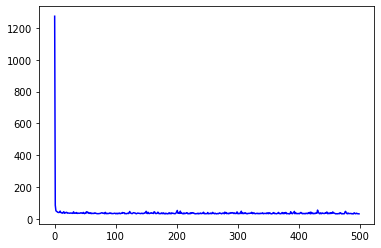

In [37]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

[41.77077865600586, 38.51863479614258, 38.860965728759766, 36.764678955078125, 42.0822868347168, 45.77945327758789, 35.8704833984375, 40.11981964111328, 39.00491714477539, 42.34519958496094, 41.07728958129883, 36.85840606689453, 37.85956954956055, 37.5223388671875, 37.8147087097168, 36.29685592651367, 37.760772705078125, 37.841094970703125, 36.73931121826172, 35.3952522277832, 38.171539306640625, 45.08411407470703, 36.03947067260742, 37.15155029296875, 37.67045211791992, 35.95234298706055, 40.86234664916992, 35.83914566040039, 35.492401123046875, 36.9333610534668, 36.32046890258789, 36.128780364990234, 37.19995880126953, 39.6226692199707, 38.2840461730957, 35.77069854736328, 36.333003997802734, 41.531639099121094, 36.892642974853516, 34.05598831176758, 36.14469528198242, 36.6588249206543, 45.37125015258789, 39.058929443359375, 43.873783111572266, 39.37673568725586, 35.645992279052734, 37.890167236328125, 35.2060661315918, 38.813560485839844, 34.22119903564453, 35.66849899291992, 34.881

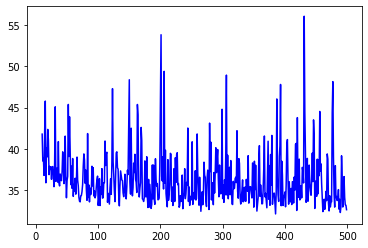

In [38]:
# Plot all but the first 10, epoch=10以后局部放大看一看
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

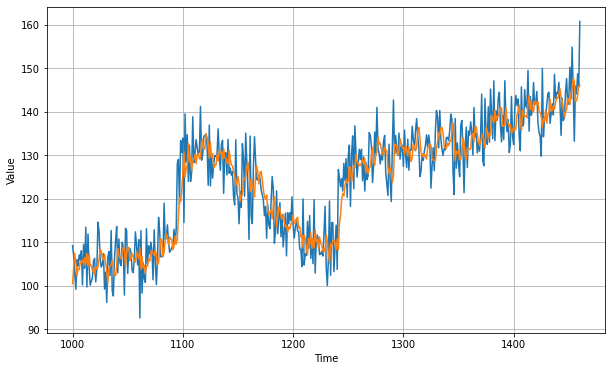

In [39]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [40]:
print(mean_absolute_error(x_valid, results).numpy())

4.5841355
